# Student Performance Indicator

## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection
[Dataset Source](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)

The data consists of 8 column and 1000 rows.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [4]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The dataset contains information on 1,000 students, capturing both categorical attributes and numerical test scores. Below is an overview of the data:

1. **Observations and Structure:**
   - **Rows:** 1,000 individual student records.
   - **Columns:** 8 variables, split into categorical and numerical types.

2. **Categorical Variables:**
   - **gender:** Indicates the student’s gender (e.g., male, female).
   - **race_ethnicity:** Represents the ethnic group or demographic category (e.g., group A, B, C, etc.).
   - **parental_level_of_education:** Describes the highest education level attained by the student’s parents (e.g., bachelor's degree, some college, master’s degree, etc.).
   - **lunch:** Specifies the type of lunch program (e.g., standard, free/reduced), which can be indicative of socioeconomic status.
   - **test_preparation_course:** Indicates whether the student completed a test preparation course (e.g., completed, none).

   These categorical fields provide context regarding the student's background, which can be used to analyze differences in performance.

3. **Numerical Variables (Test Scores):**
   - **math_score, reading_score, writing_score:** Each score ranges from 0 to 100.
   - **Descriptive Statistics:**
     - **Mean Scores:** Approximately 66 for math, 69 for reading, and 68 for writing.
     - **Variability:** Standard deviations are around 15 for each score, suggesting moderate dispersion.
     - **Ranges:** Notable extremes include a math score minimum of 0 (which could be an outlier or data anomaly), reading score minimum of 17, and writing score minimum of 10, with all scores capped at 100.
     - **Quartiles:** The median scores are close to the means, with the 25th and 75th percentiles indicating a relatively symmetric distribution for most scores.

4. **Data Quality:**
   - **Completeness:** All columns have 1,000 non-null entries, indicating no missing values.
   - **Memory Usage:** The dataset is compact, using approximately 62.6 KB of memory.

5. **Analytical Opportunities:**
   - The combination of categorical background variables and numerical performance scores makes this dataset ideal for investigating how factors such as gender, socioeconomic status (as inferred from lunch type and parental education), and preparatory courses may influence academic achievement.
   - Potential analyses include group comparisons, correlation studies, and regression models to understand the relationships and impacts of these variables on student performance.

This overview provide us a clear starting point for further exploration and analysis of the factors affecting student performance in this dataset.

In [7]:
# Checking for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [9]:
# Checking for unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [3]:
# Categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

In [11]:
print(f"{len(cat_cols)} categorical columns: {cat_cols}")
print(f"{len(num_cols)} numerical columns: {num_cols}")

5 categorical columns: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')
3 numerical columns: Index(['math_score', 'reading_score', 'writing_score'], dtype='object')


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Add new column to the dataframe
df["total_score"] = df.iloc[:, 5:8].sum(axis=1)
df["average"] = round(df["total_score"] / 3, 2)

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [15]:
max_reading = df[df['reading_score'] == 100]['average'].count()
max_writing = df[df['writing_score'] == 100]['average'].count()
max_math = df[df['math_score'] == 100]['average'].count()

print(f"Number of students who scored 100 in reading: {max_reading}")
print(f"Number of students who scored 100 in writing: {max_writing}")
print(f"Number of students who scored 100 in math: {max_math}")

Number of students who scored 100 in reading: 17
Number of students who scored 100 in writing: 14
Number of students who scored 100 in math: 7


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students who scored less than 20 in reading: {reading_less_20}")
print(f"Number of students who scored less than 20 in writing: {writing_less_20}")
print(f"Number of students who scored less than 20 in math: {math_less_20}")

Number of students who scored less than 20 in reading: 1
Number of students who scored less than 20 in writing: 3
Number of students who scored less than 20 in math: 4


## EDA

### Univariate Analysis

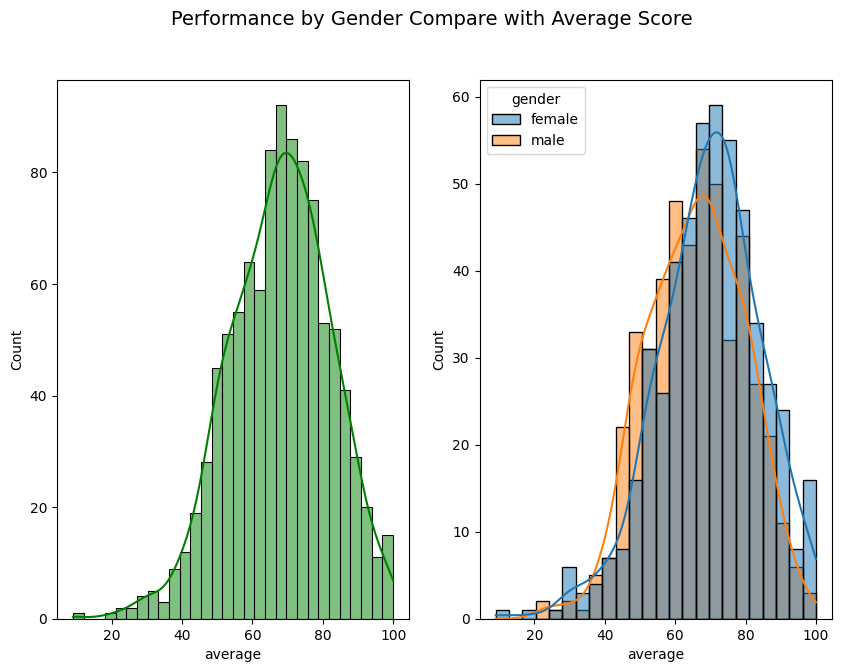

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
fig.suptitle("Performance by Gender Compare with Average Score", fontsize=14)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="average", bins=30, kde=True, color="g")
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="average", kde=True, hue="gender")
plt.show()

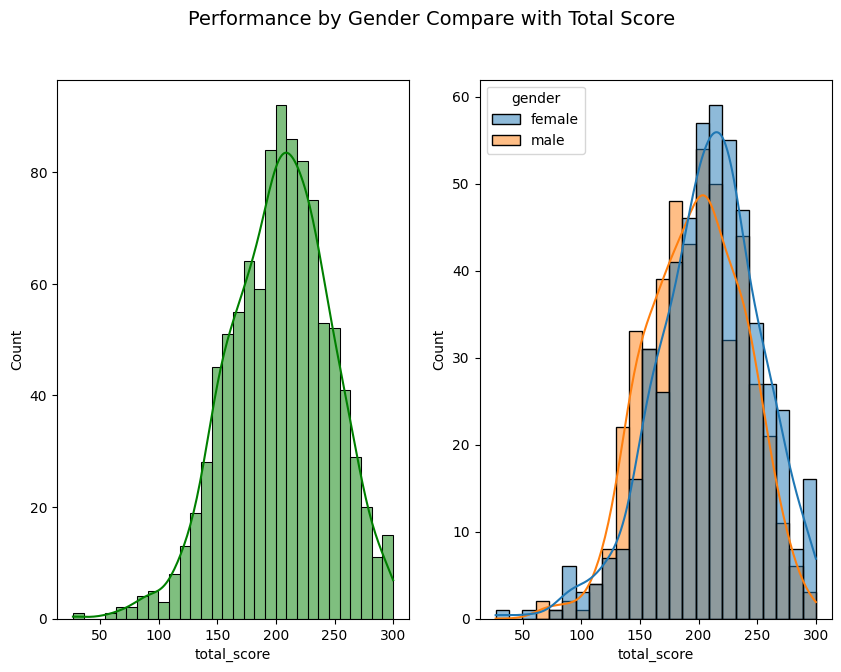

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
fig.suptitle("Performance by Gender Compare with Total Score", fontsize=14)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="total_score", bins=30, kde=True, color="g")
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="total_score", kde=True, hue="gender")
plt.show()

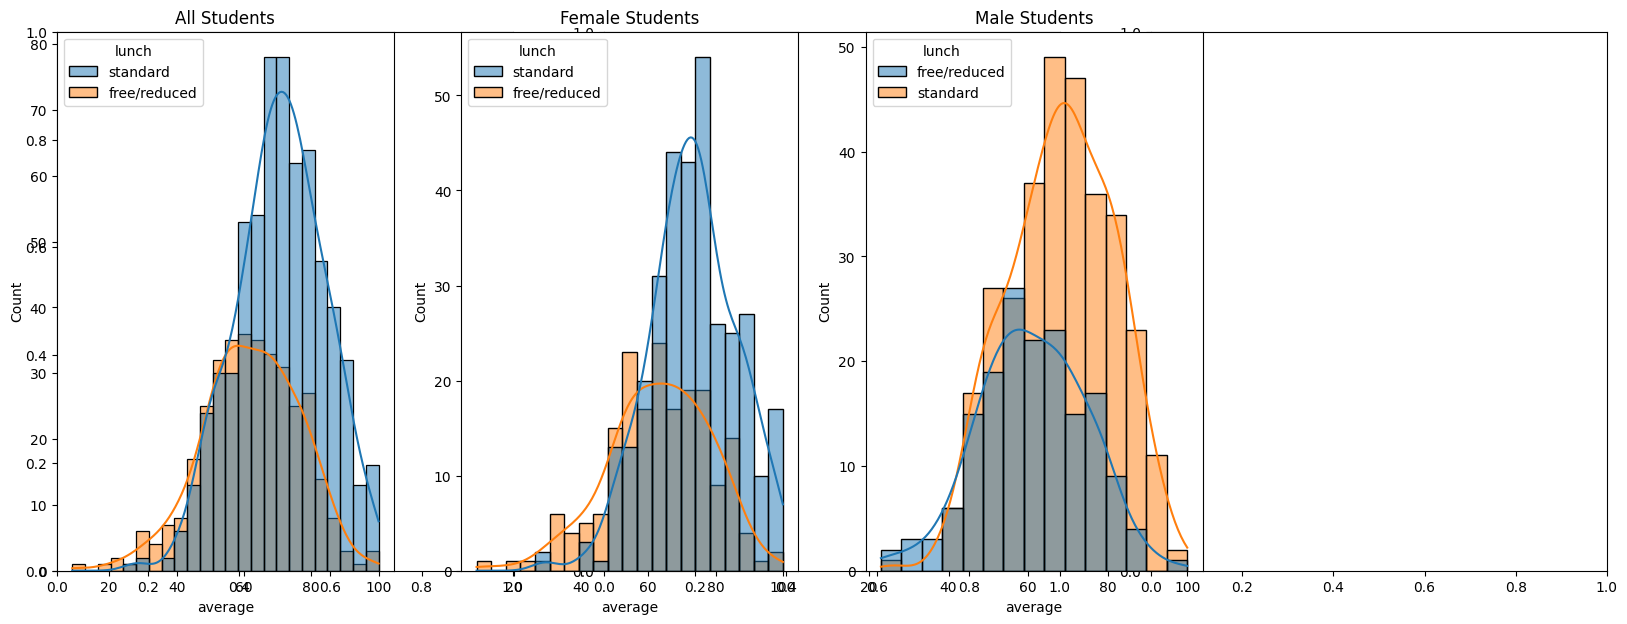

In [22]:
plt.subplots(1, 3, figsize=(20, 7))
plt.subplot(1, 4, 1)
sns.histplot(data=df, x="average", kde=True,hue='lunch')
plt.title("All Students")
plt.subplot(1, 4, 2)
sns.histplot(data=df[df.gender=="female"], x="average", kde=True, hue="lunch")
plt.title("Female Students")
plt.subplot(1, 4, 3)
sns.histplot(data=df[df.gender=="male"], x="average", kde=True, hue="lunch")
plt.title("Male Students")
plt.show()

**Insights**
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

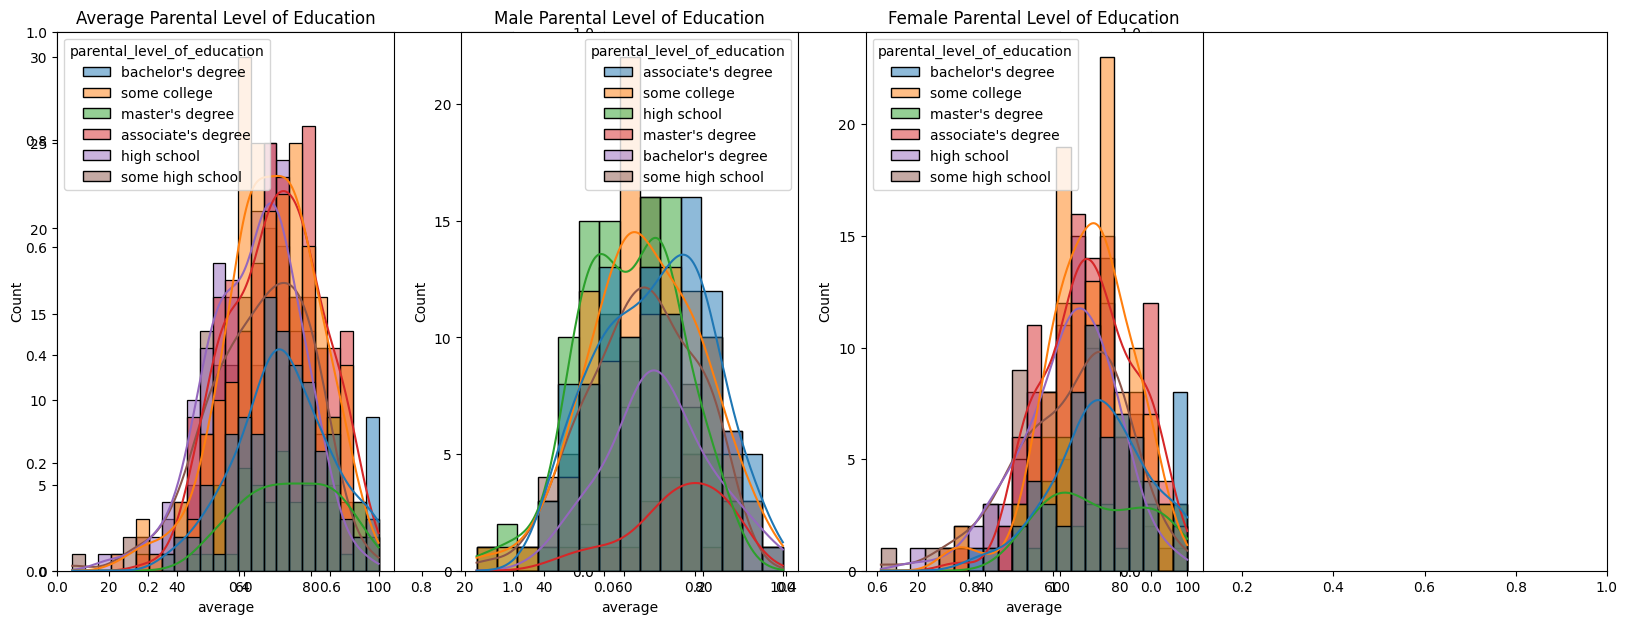

In [25]:
plt.subplots(1, 3, figsize=(20, 7))
plt.subplot(1, 4, 1)
ax = sns.histplot(data=df, x="average", kde=True, hue="parental_level_of_education")
plt.title("Average Parental Level of Education")
plt.subplot(1, 4, 2)
ax = sns.histplot(data=df[df.gender=="male"], x="average", kde=True, hue="parental_level_of_education")
plt.title("Male Parental Level of Education")
plt.subplot(1, 4, 3)
ax = sns.histplot(data=df[df.gender=="female"], x="average", kde=True, hue="parental_level_of_education")
plt.title("Female Parental Level of Education")
plt.show()

**Insights**
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

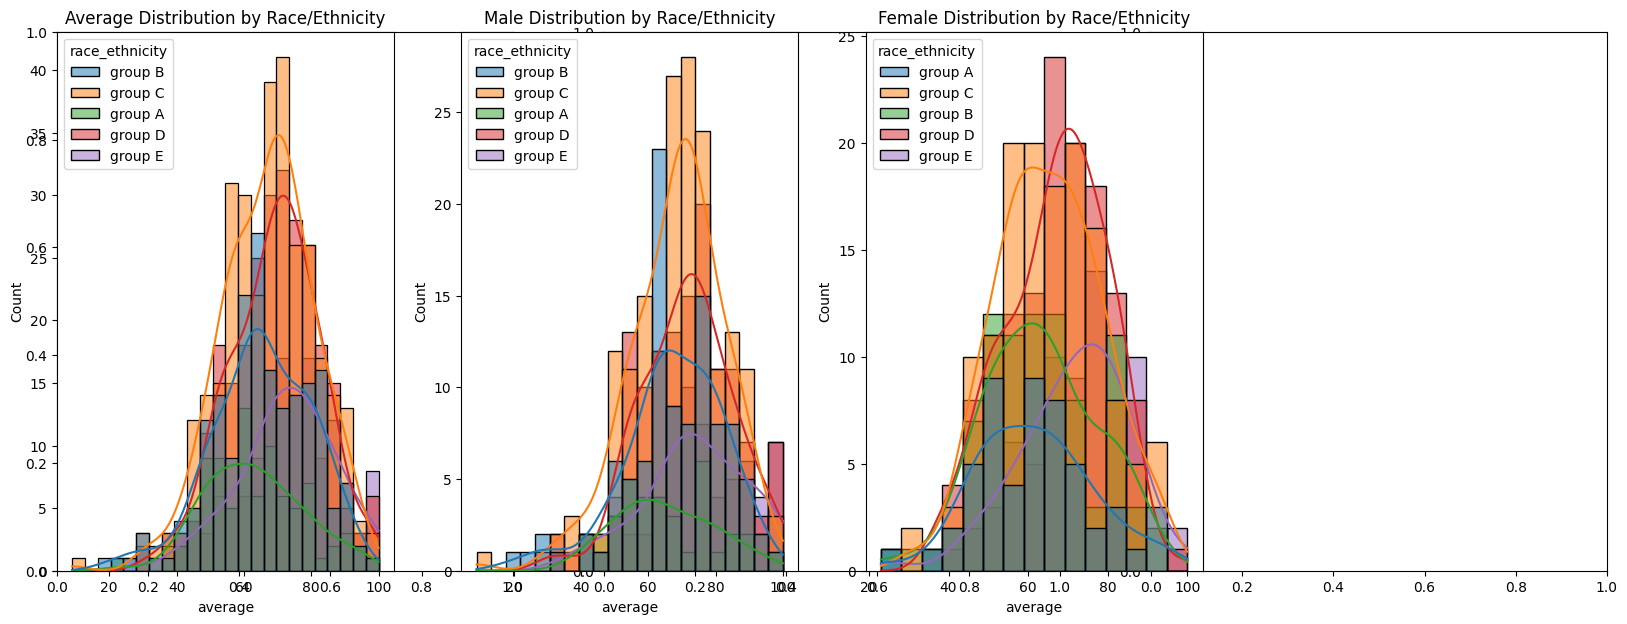

In [28]:
plt.subplots(1, 3, figsize=(20, 7))
plt.subplot(1, 4, 1)
ax = sns.histplot(data=df, x="average", kde=True, hue="race_ethnicity")
plt.title("Average Distribution by Race/Ethnicity")
plt.subplot(1, 4, 2)
ax = sns.histplot(data=df[df.gender=="female"], x="average", kde=True, hue="race_ethnicity")
plt.title("Male Distribution by Race/Ethnicity")
plt.subplot(1, 4, 3)
ax = sns.histplot(data=df[df.gender=="male"], x="average", kde=True, hue="race_ethnicity")
plt.title("Female Distribution by Race/Ethnicity")
plt.show()


**Insights**
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

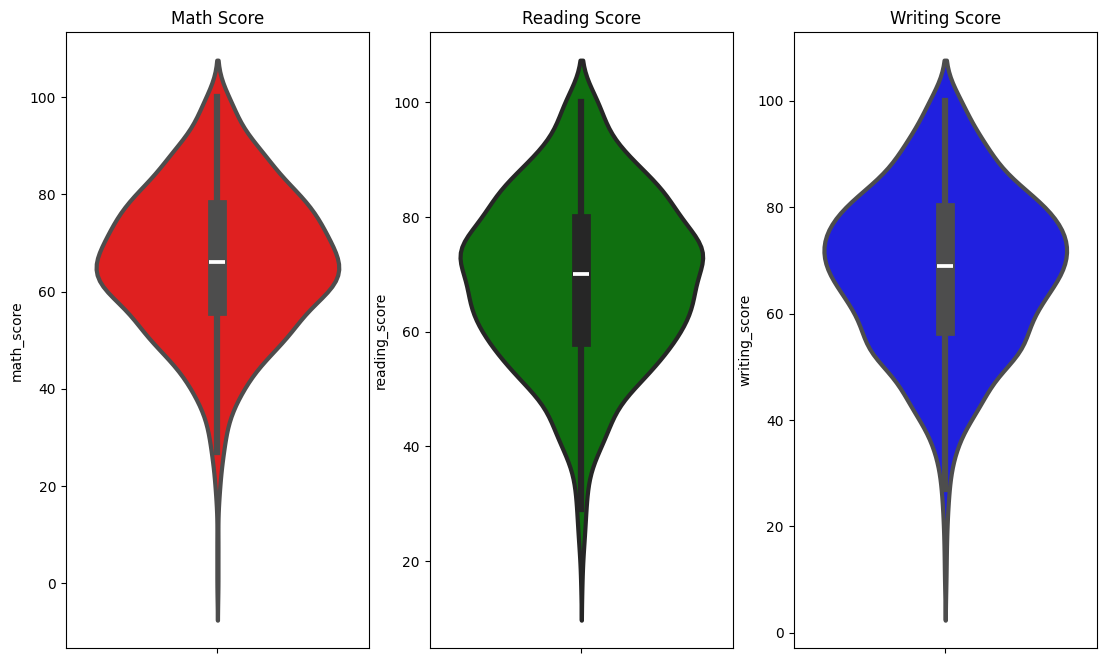

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title("Math Score")
sns.violinplot(y='math_score', data=df, color="red", linewidth=3)
plt.subplot(1, 4, 2)
plt.title("Reading Score")
sns.violinplot(y="reading_score", data=df, color="green", linewidth=3)
plt.subplot(1, 4, 3)
plt.title("Writing Score")
sns.violinplot(y="writing_score", data=df, color="blue", linewidth=3)
plt.show()

**Insights**
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

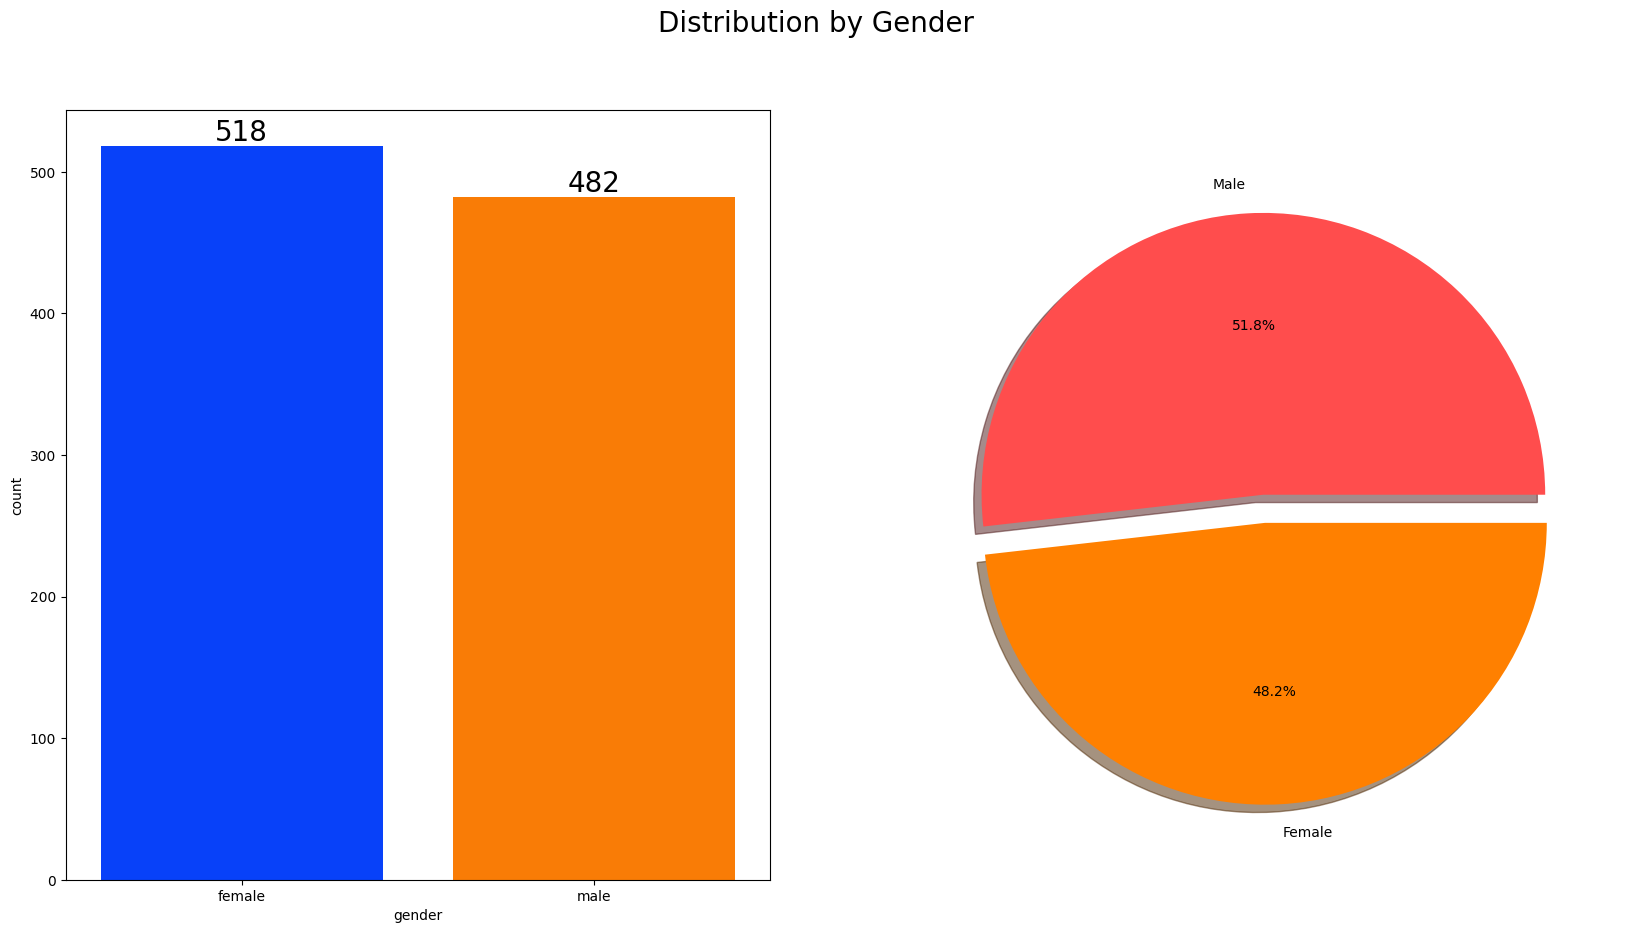

In [35]:
f, ax=plt.subplots(1, 2, figsize=(20, 10))
f.suptitle('Distribution by Gender', fontsize=20)
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),
        labels=['Male','Female'],
        explode=[0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        colors=['#ff4d4d', '#ff8000'])
plt.show()

**Insights**
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

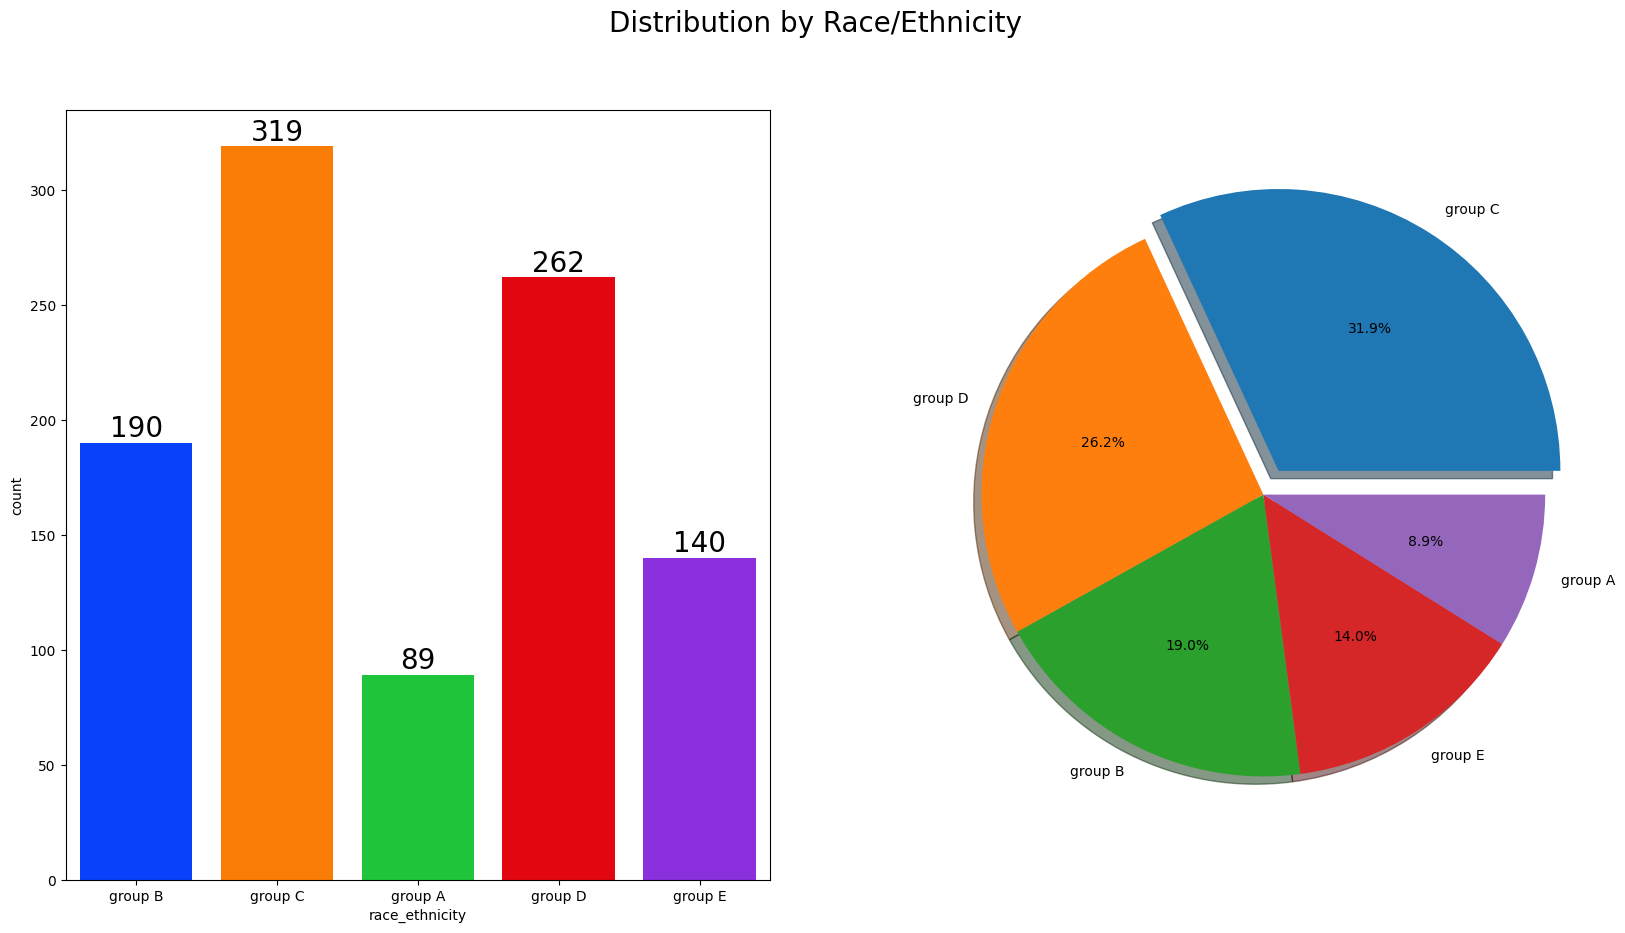

In [41]:
f, ax=plt.subplots(1, 2, figsize=(20, 10))
f.suptitle('Distribution by Race/Ethnicity', fontsize=20)
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(),
        labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1,0,0,0,0],
        autopct='%1.1f%%',
        shadow=True)
plt.show()  

**Insights**
- Most of the student belonging from group C /group D.
Lowest number of students belong to groupA.

### Bivariate Analysis

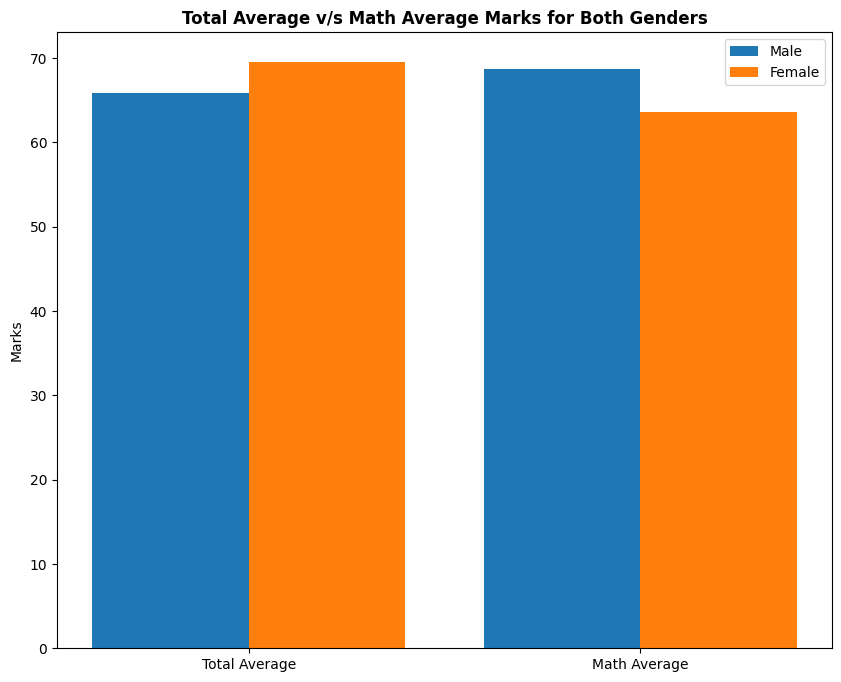

In [42]:
gender_group = df.groupby('gender').mean(numeric_only=True)

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average v/s Math Average Marks for Both Genders", fontweight='bold')
plt.legend()
plt.show()

**Insights**
- On an average females have a better overall score than men.
whereas males have scored higher in Maths.

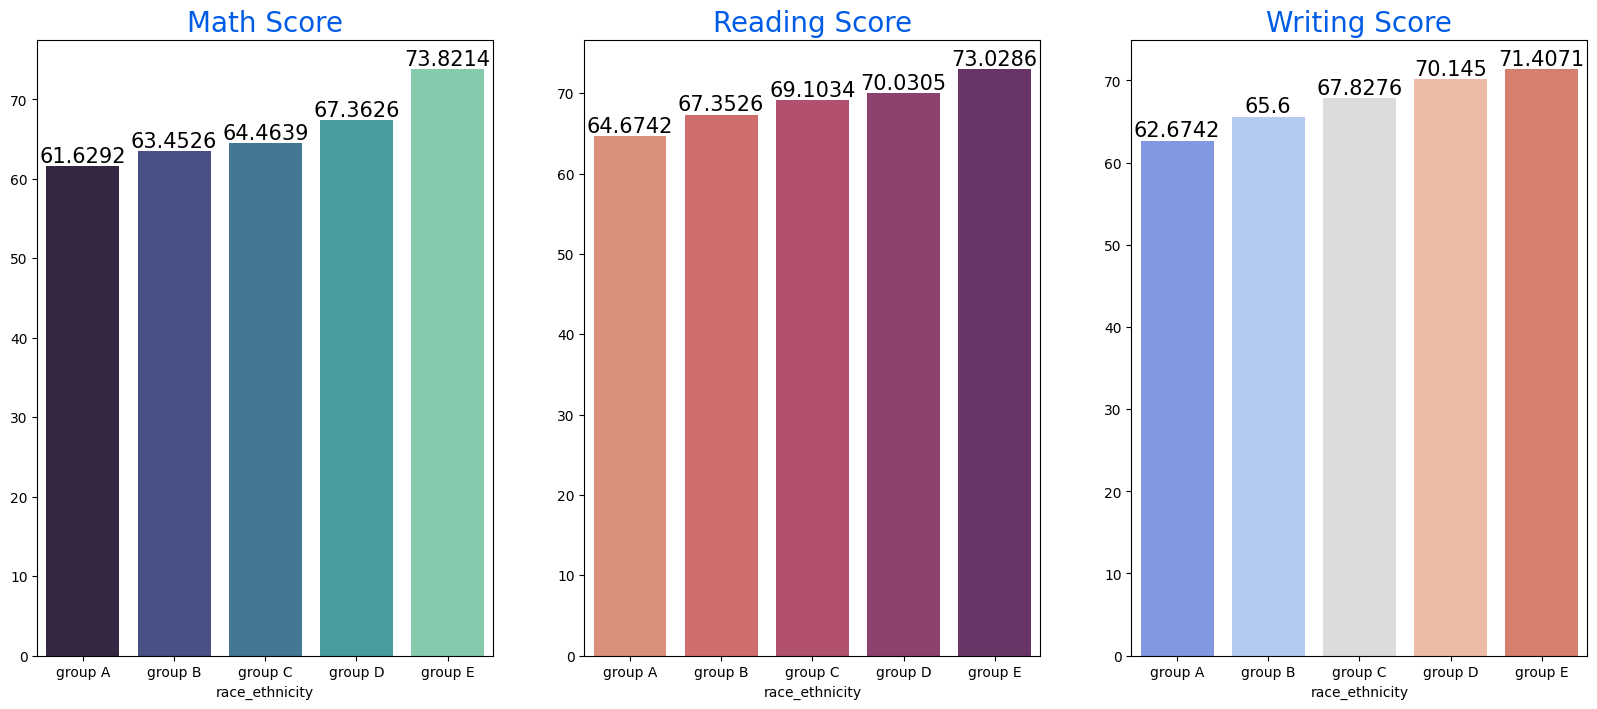

In [43]:
group_data2 = df.groupby('race_ethnicity')

fig, ax=plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=group_data2['math_score'].mean().index,
            y=group_data2['math_score'].mean().values,
            palette='mako',
            ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=group_data2['reading_score'].mean().index,
            y=group_data2['reading_score'].mean().values,
            palette='flare',
            ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=group_data2['writing_score'].mean().index,
            y=group_data2['writing_score'].mean().values,
            palette='coolwarm',
            ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

**Insights**
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

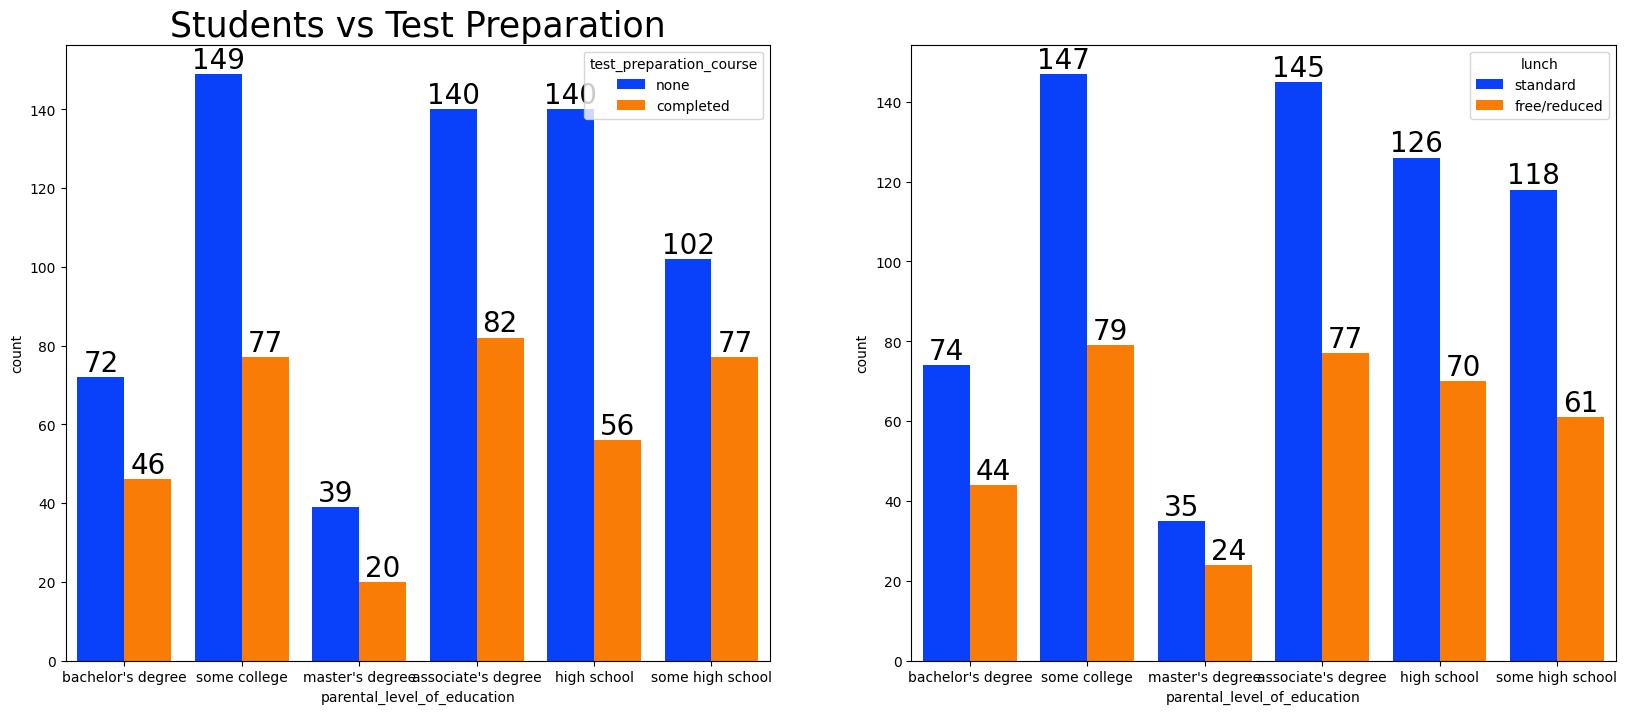

In [44]:
fig, ax=plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x=df['parental_level_of_education'],
              data=df,
              palette='bright',
              hue='test_preparation_course',
              saturation=0.95,
              ax=ax[0])
ax[0].set_title('Students vs Test Preparation', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
sns.countplot(x=df['parental_level_of_education'],
              data=df,
              palette='bright',
              hue='lunch',
              saturation=0.95,
              ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

**Insights**
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

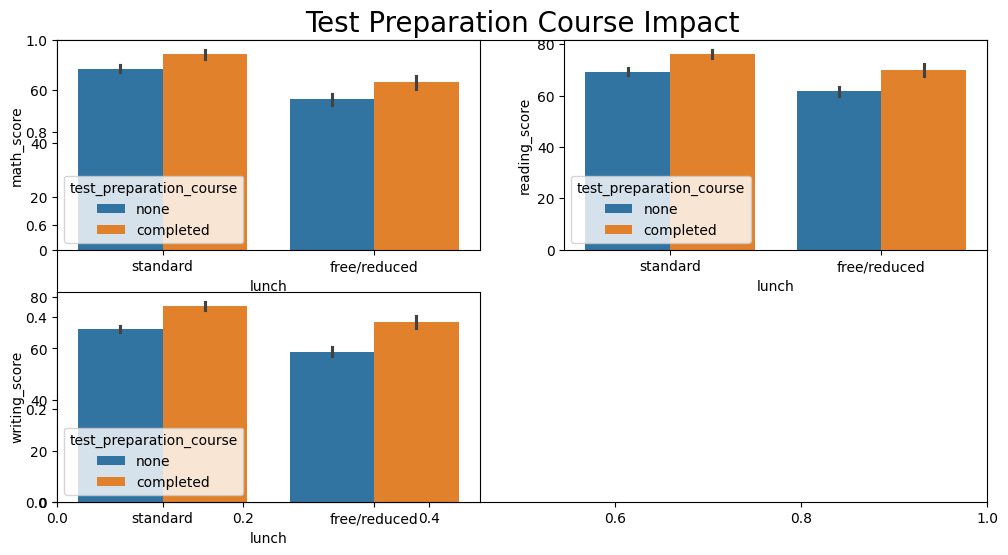

In [46]:
plt.figure(figsize=(12, 6))
plt.title('Test Preparation Course Impact', fontsize=20)
plt.subplot(2, 2, 1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2, 2, 2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2, 2, 3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

**Insights**
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### Multivariate Analysis

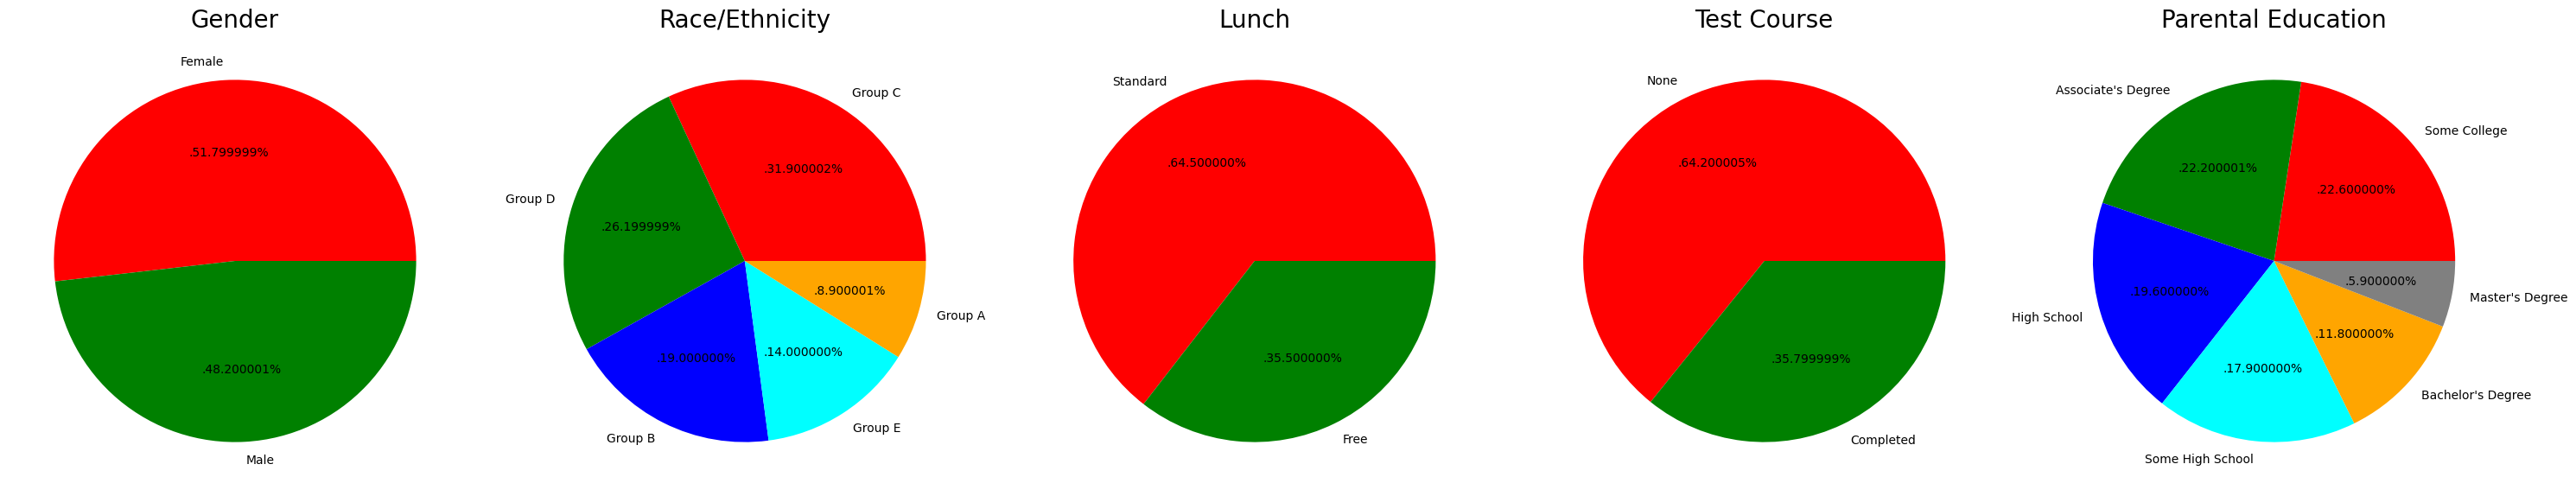

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan' ,'orange', 'grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

**Insights**
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

**Conclusions**
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [ ]:
# Save cleaned data
# df.to_csv('data/stud_cleaned.csv', index=False)